# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Lukman Harahap
- **Email:** lukmanharahap28@gmail.com
- **ID Dicoding:** lukmanharahap

## Menentukan Pertanyaan Bisnis

- Bagaimana tren polutan (PM2.5 dan PM10) berubah selama periode tertentu?
- Apa hubungan antara polutan dan faktor cuaca seperti suhu (TEMP), tekanan udara (PRES), titik embun (DEWP), hujan (RAIN), dan kecepatan angin (WSPM)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
Aotizhongxin_df = pd.read_csv('https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
Aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Dataset yang berupa file CSV berisi parameter berupa polutan, kondisi cuaca, dan lokasi pengukuran. Kolom-kolom yang terdapat pada data adalah sebagai berikut: No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, dan station.
- Dataset ini menunjukkan kualitas udara di suatu stasiun pengukuran, pada kasus ini yaitu Aotizhongxin.

### Assessing Data

In [3]:
Aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [4]:
Aotizhongxin_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


In [5]:
Aotizhongxin_df.duplicated().sum()

0

In [6]:
Aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


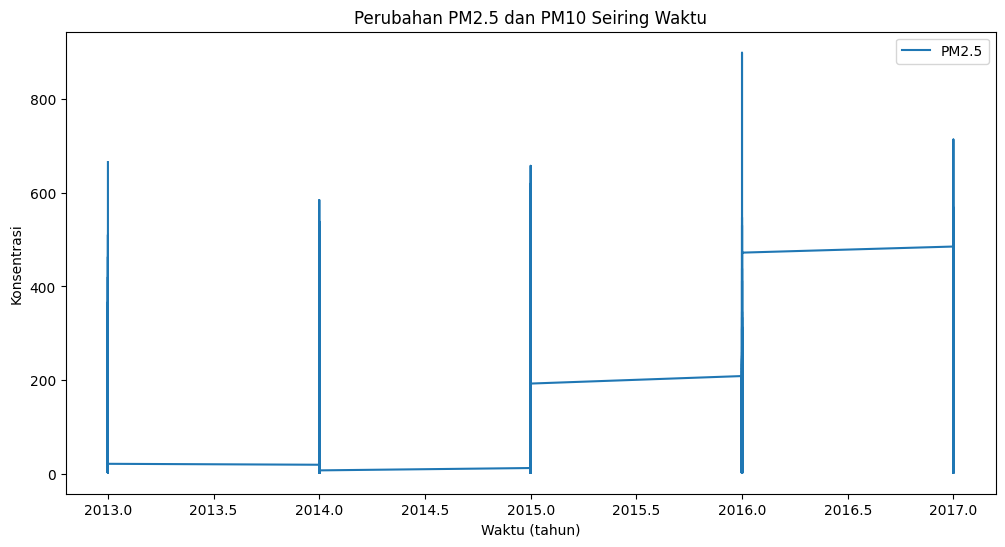

In [7]:
plt.figure(figsize=(12,6))
plt.plot(Aotizhongxin_df['year'], Aotizhongxin_df['PM2.5'], label='PM2.5')
# plt.plot(Aotizhongxin_df['year'], Aotizhongxin_df['PM10'], label='PM10')
plt.legend()
plt.title('Perubahan PM2.5 dan PM10 Seiring Waktu')
plt.xlabel('Waktu (tahun)')
plt.ylabel('Konsentrasi')
plt.show()

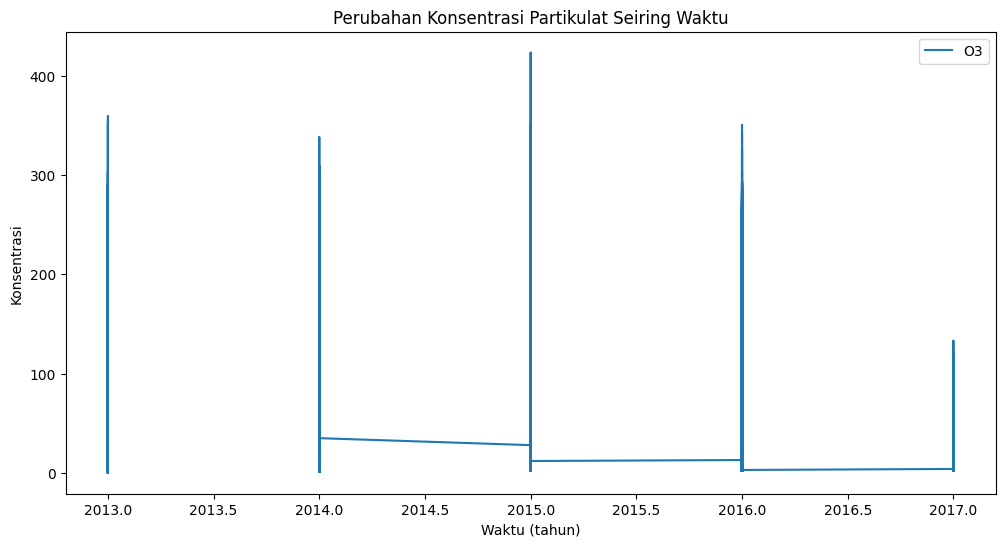

In [8]:
plt.figure(figsize=(12,6))
# plt.plot(Aotizhongxin_df['year'], Aotizhongxin_df['SO2'], label='SO2')
# plt.plot(Aotizhongxin_df['year'], Aotizhongxin_df['NO2'], label='NO2')
# plt.plot(Aotizhongxin_df['year'], Aotizhongxin_df['CO'], label='CO')
plt.plot(Aotizhongxin_df['year'], Aotizhongxin_df['O3'], label='O3')
plt.legend()
plt.title('Perubahan Konsentrasi Partikulat Seiring Waktu')
plt.xlabel('Waktu (tahun)')
plt.ylabel('Konsentrasi')
plt.show()

**Insight:**
- Dataset memiliki missing value pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES DEWP, RAIN, wd, dan WSPM serta tidak terdapat duplikasi data.
- Sebaran kualitas udara pada setiap data cenderung mirip di waktu-waktu yang berdekatan.

### Cleaning Data

In [9]:
Aotizhongxin_df = Aotizhongxin_df.dropna(subset=['wd', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'])

In [10]:
Aotizhongxin_df = Aotizhongxin_df.interpolate(method='linear')

<ipython-input-10-cd819c818904>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  Aotizhongxin_df = Aotizhongxin_df.interpolate(method='linear')


**Insight:**
- Pada kolom wd, TEMP, PRES, DEWP, RAIN, dan WSPM tidak terlalu banyak missing value sehingga baris-baris yang memiliki missing value tersebut bisa langsung dihapus.
- Pada kolom PM2.5, PM10, SO2, NO2, CO, dan O3 memiliki cukup banyak missing value sehingga sayang jika hanya dihapus. Pada sebaran data-data tersebut juga diketahui bahwa sebaran data cenderung mirip pada waktu-waktu yang berdekatan sehingga cocok jika missing value di-handle dengan teknik interpolasi linear.

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
Aotizhongxin_by_year = Aotizhongxin_df.groupby('year').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
})
Aotizhongxin_by_year

,PM2.5,PM10,SO2,NO2,CO,O3
year,,,,,,
2013,82.439262,112.946139,23.600970,63.353914,1163.900926,47.212444
2014,89.756680,122.288913,21.518783,63.167401,1186.817767,48.581845
2015,81.803279,112.155278,14.356380,60.894568,1436.434773,63.623109
2016,74.205125,94.382679,10.860714,48.299908,1189.572131,62.035694
2017,94.307024,106.914193,20.757060,65.997104,1662.780594,47.585445


In [12]:
Aotizhongxin_by_month = Aotizhongxin_df.groupby('month').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
})
Aotizhongxin_by_month

,PM2.5,PM10,SO2,NO2,CO,O3
month,,,,,,
1,92.420183,113.721747,35.038396,65.634013,1946.364254,26.982841
2,87.204839,105.741411,31.695789,54.297377,1466.808275,43.235685
3,99.956571,150.495361,31.682010,63.292606,1372.346723,47.305968
4,78.473785,131.610069,16.439925,52.765205,844.499653,64.546367
5,67.351076,115.387727,16.021419,48.963517,792.175185,88.508787
6,71.348611,87.050521,8.441715,49.436039,943.982118,94.112582
7,74.883451,84.753448,5.743092,47.731384,828.318365,96.548945
8,55.865210,72.112975,4.450008,48.478405,780.336134,84.991913
9,64.302203,87.020559,7.082156,59.269801,911.065035,51.510423


In [13]:
Aotizhongxin_by_day = Aotizhongxin_df.groupby('day').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
})
Aotizhongxin_by_day

,PM2.5,PM10,SO2,NO2,CO,O3
day,,,,,,
1,90.748400,114.148827,14.948350,59.330596,1364.868375,51.761014
2,74.534653,93.270609,18.115826,57.542870,1243.773913,52.886110
3,86.002292,115.329427,19.022310,59.600419,1387.720170,56.727304
4,93.689130,117.356522,17.118190,61.749958,1529.933360,58.081042
5,78.858507,103.854601,16.010103,54.900738,1240.739583,61.538433
6,89.044658,113.110585,19.191331,57.657725,1370.612852,57.436490
7,87.703030,110.176748,18.777928,58.196681,1390.372575,54.755680
8,84.895217,108.181304,19.026282,55.662327,1231.115652,57.173524
9,77.602054,101.320870,16.075393,56.477171,1129.746219,55.161986


In [14]:
Aotizhongxin_by_hour = Aotizhongxin_df.groupby('hour').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
})
Aotizhongxin_by_hour

,PM2.5,PM10,SO2,NO2,CO,O3
hour,,,,,,
0,91.970553,124.577657,18.276110,71.401637,1431.623942,38.369478
1,92.401995,124.148006,18.542549,70.451562,1458.644118,34.590803
2,91.561936,120.901278,17.765541,67.212689,1441.735963,31.123192
3,88.483596,114.610540,16.546723,64.750587,1362.186354,28.827770
4,85.148978,109.326820,15.581163,63.827247,1317.320346,27.116451
5,81.710562,103.797188,14.977738,62.044003,1300.079435,25.119979
6,79.590913,100.896361,14.865005,61.297954,1297.920399,24.123600
7,77.621416,99.326763,15.149979,61.390282,1312.458198,23.147212
8,77.368705,101.519606,16.682021,61.369859,1325.067619,25.235355


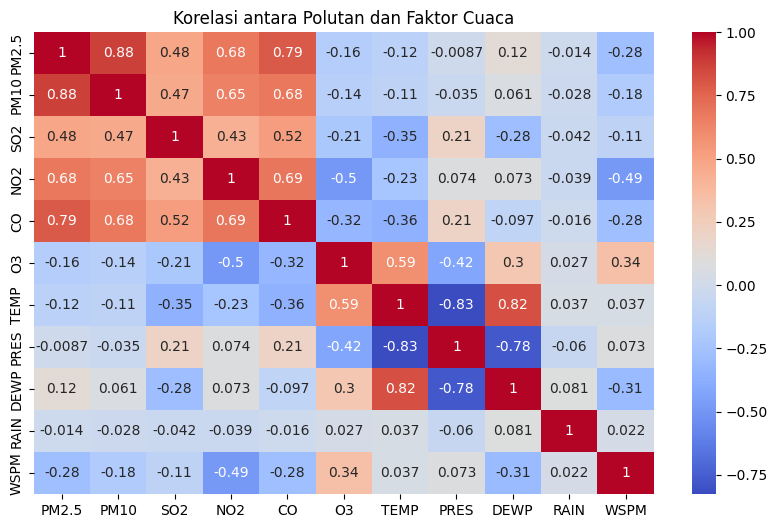

In [15]:
correlation_matrix = Aotizhongxin_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Polutan dan Faktor Cuaca')
plt.show()

**Insight:**
- Dari eksplorasi di atas diketahui bahwa ada korelasi positif yang cukup signifikan antara suhu (TEMP) dan ozon (O3) dengan nilai korelasi 0.59. Hal ini menunjukkan bahwa kadar ozon cenderung meningkat ketika suhu naik.
- Suhu (TEMP) memiliki korelasi negatif dengan beberapa polutan seperti PM2.5, PM10, SO2, NO2, dan CO. Hal ini menandakan bahwa konsentrasi polutan berkurang ketika suhu naik.
- Kecepatan angin (WSPM) memiliki korelasi negatif dengan beberapa polutan seperti PM2.5, PM10, SO2, NO2, dan CO. Hal ini menandakan bahwa semakin kencang kecepatan angin maka akan sedikit menghilangkan polutan sehingga konsentrasi polutan semakin berkurang.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [16]:
Aotizhongxin_df['day_of_week'] = pd.to_datetime(Aotizhongxin_df[['year', 'month', 'day', 'hour']]).dt.day_name()
Aotizhongxin_copy = Aotizhongxin_df.copy()
Aotizhongxin_copy['day_of_week'] = pd.Categorical(Aotizhongxin_copy['day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
Aotizhongxin_copy

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,day_of_week
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Friday
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Friday
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Friday
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Friday
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin,Tuesday
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin,Tuesday
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin,Tuesday
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin,Tuesday


In [17]:
avg_pollutant_by_day = Aotizhongxin_copy.groupby('day_of_week').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
})
avg_pollutant_by_day

<ipython-input-17-00b5cf9a0966>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pollutant_by_day = Aotizhongxin_copy.groupby('day_of_week').agg({


,PM2.5,PM10,SO2,NO2,CO,O3
day_of_week,,,,,,
Monday,74.796648,103.041267,17.343689,55.346629,1162.137791,57.725828
Tuesday,80.561683,107.715631,17.381976,59.256205,1268.585259,54.755563
Wednesday,81.176181,107.067473,17.202200,59.692373,1269.522111,53.853036
Thursday,81.958851,108.792556,16.922359,58.451048,1233.851339,55.454922
Friday,85.226228,112.279812,17.618303,61.016213,1297.176281,53.541781
Saturday,90.550021,119.965397,18.545203,61.785288,1338.144214,54.579592
Sunday,83.382359,112.581749,17.269066,57.693191,1278.235683,57.749539


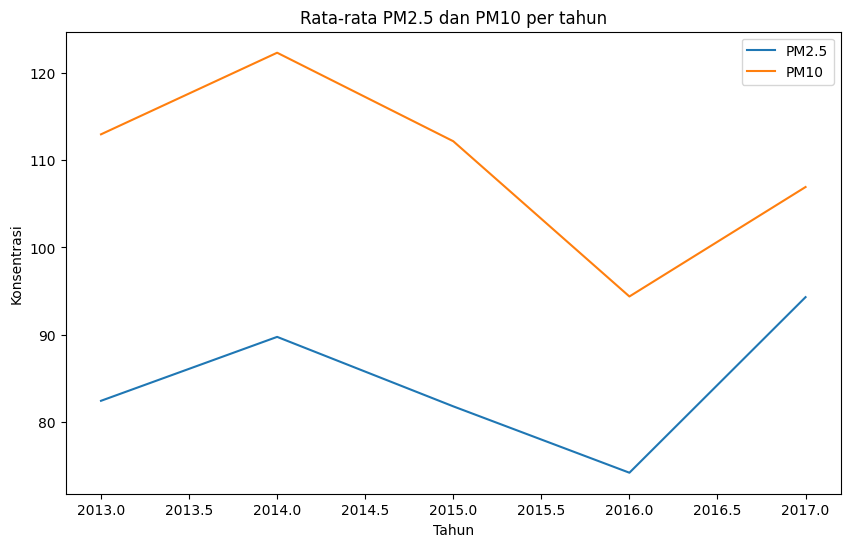

In [18]:
plt.figure(figsize=(10,6))
plt.plot(Aotizhongxin_by_year.index, Aotizhongxin_by_year['PM2.5'], label='PM2.5')
plt.plot(Aotizhongxin_by_year.index, Aotizhongxin_by_year['PM10'], label='PM10')
plt.legend()
plt.title('Rata-rata PM2.5 dan PM10 per tahun')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi')
plt.show()

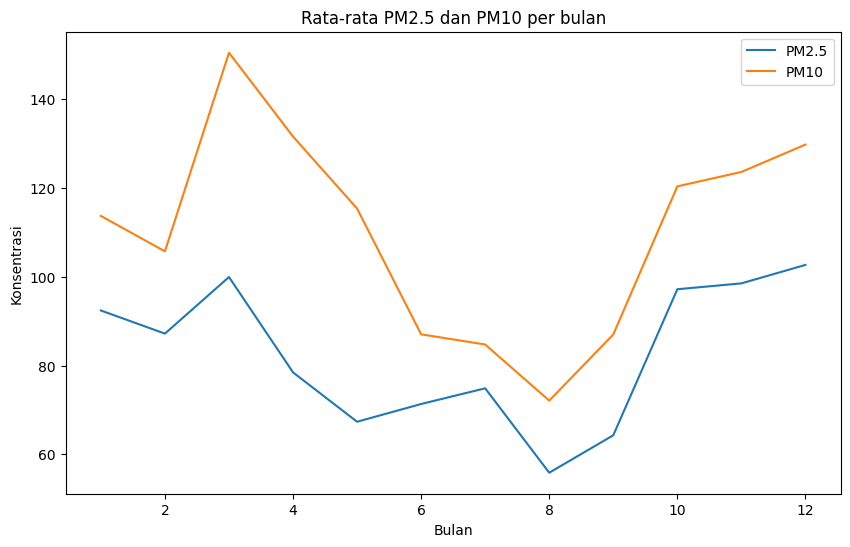

In [19]:
plt.figure(figsize=(10,6))
plt.plot(Aotizhongxin_by_month.index, Aotizhongxin_by_month['PM2.5'], label='PM2.5')
plt.plot(Aotizhongxin_by_month.index, Aotizhongxin_by_month['PM10'], label='PM10')
plt.legend()
plt.title('Rata-rata PM2.5 dan PM10 per bulan')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi')
plt.show()

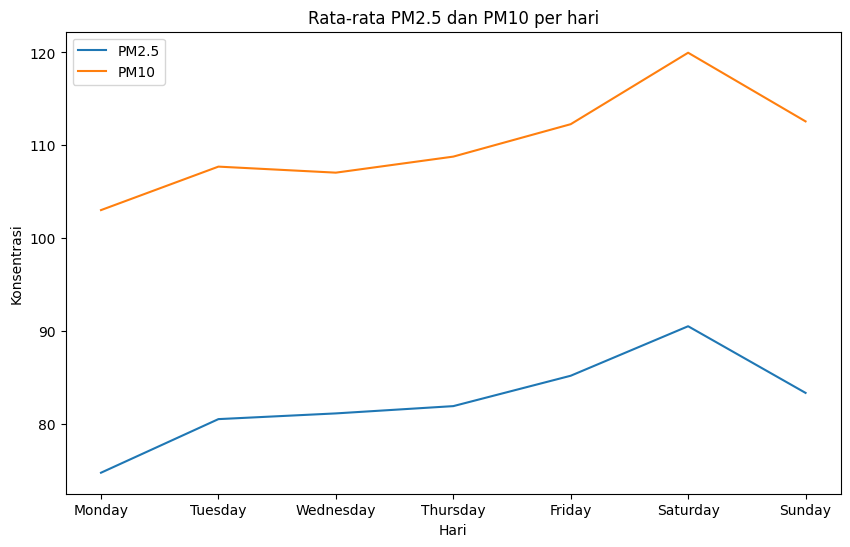

In [20]:
plt.figure(figsize=(10,6))
plt.plot(avg_pollutant_by_day.index, avg_pollutant_by_day['PM2.5'], label='PM2.5')
plt.plot(avg_pollutant_by_day.index, avg_pollutant_by_day['PM10'], label='PM10')
plt.legend()
plt.title('Rata-rata PM2.5 dan PM10 per hari')
plt.xlabel('Hari')
plt.ylabel('Konsentrasi')
plt.show()

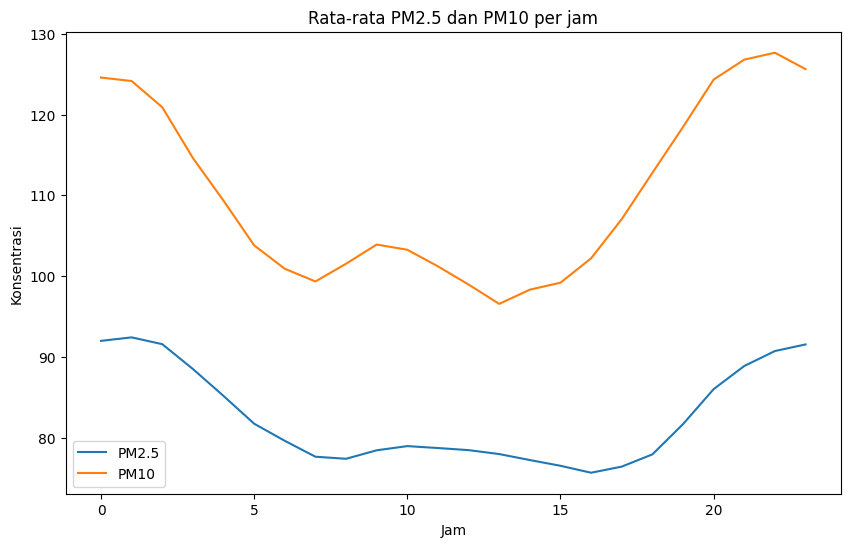

In [21]:
plt.figure(figsize=(10,6))
plt.plot(Aotizhongxin_by_hour.index, Aotizhongxin_by_hour['PM2.5'], label='PM2.5')
plt.plot(Aotizhongxin_by_hour.index, Aotizhongxin_by_hour['PM10'], label='PM10')
plt.legend()
plt.title('Rata-rata PM2.5 dan PM10 per jam')
plt.xlabel('Jam')
plt.ylabel('Konsentrasi')
plt.show()

### Pertanyaan 2:

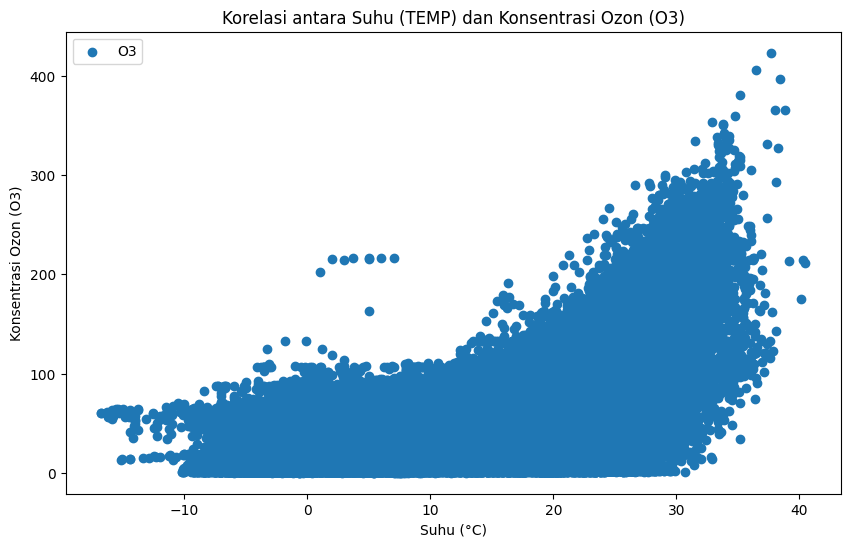

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(Aotizhongxin_df['TEMP'], Aotizhongxin_df['O3'], label='O3')
plt.legend()
plt.title('Korelasi antara Suhu (TEMP) dan Konsentrasi Ozon (O3)')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsentrasi Ozon (O3)')
plt.show()

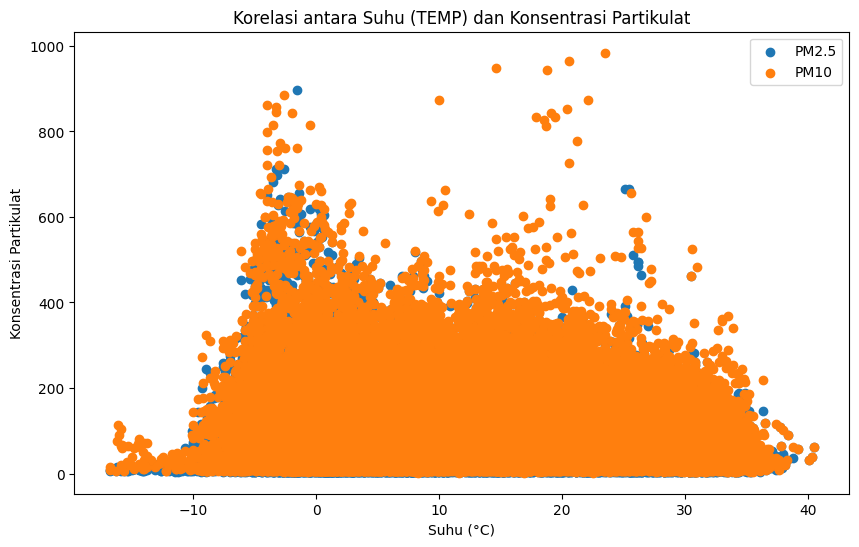

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(Aotizhongxin_df['TEMP'], Aotizhongxin_df['PM2.5'], label='PM2.5')
plt.scatter(Aotizhongxin_df['TEMP'], Aotizhongxin_df['PM10'], label='PM10')
plt.legend()
plt.title('Korelasi antara Suhu (TEMP) dan Konsentrasi Partikulat')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsentrasi Partikulat')
plt.show()

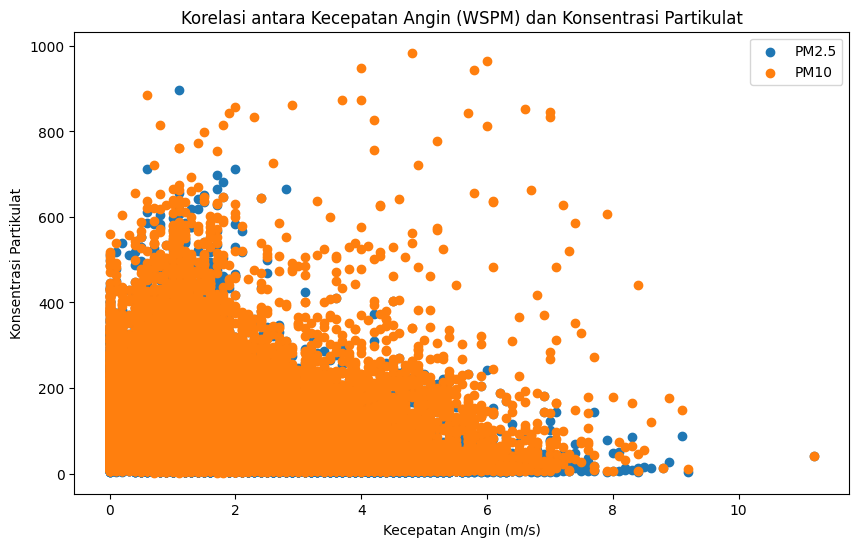

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(Aotizhongxin_df['WSPM'], Aotizhongxin_df['PM2.5'], label='PM2.5')
plt.scatter(Aotizhongxin_df['WSPM'], Aotizhongxin_df['PM10'], label='PM10')
plt.legend()
plt.title('Korelasi antara Kecepatan Angin (WSPM) dan Konsentrasi Partikulat')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('Konsentrasi Partikulat')
plt.show()

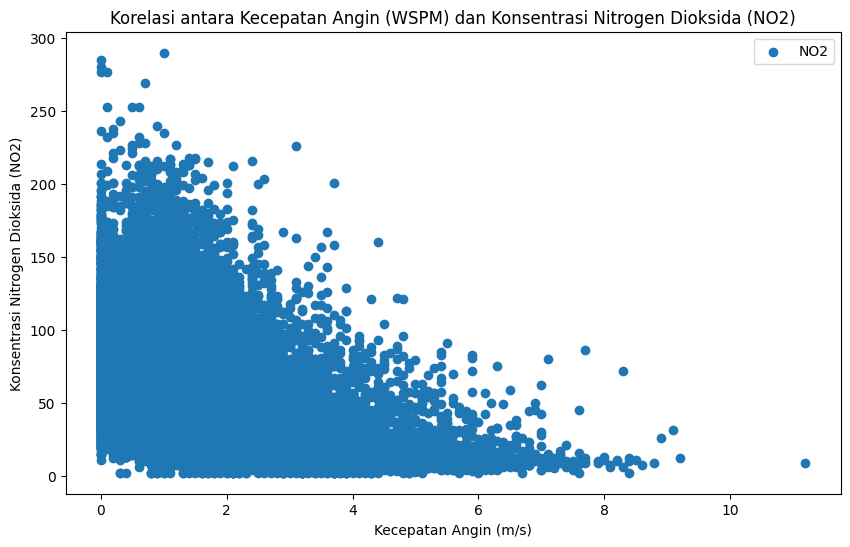

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(Aotizhongxin_df['WSPM'], Aotizhongxin_df['NO2'], label='NO2')
plt.legend()
plt.title('Korelasi antara Kecepatan Angin (WSPM) dan Konsentrasi Nitrogen Dioksida (NO2)')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('Konsentrasi Nitrogen Dioksida (NO2)')
plt.show()

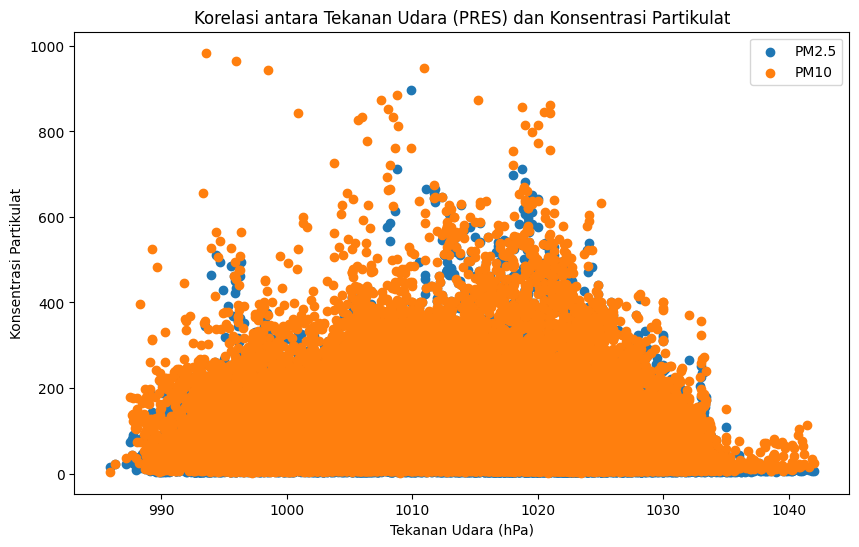

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(Aotizhongxin_df['PRES'], Aotizhongxin_df['PM2.5'], label='PM2.5')
plt.scatter(Aotizhongxin_df['PRES'], Aotizhongxin_df['PM10'], label='PM10')
plt.legend()
plt.title('Korelasi antara Tekanan Udara (PRES) dan Konsentrasi Partikulat')
plt.xlabel('Tekanan Udara (hPa)')
plt.ylabel('Konsentrasi Partikulat')
plt.show()

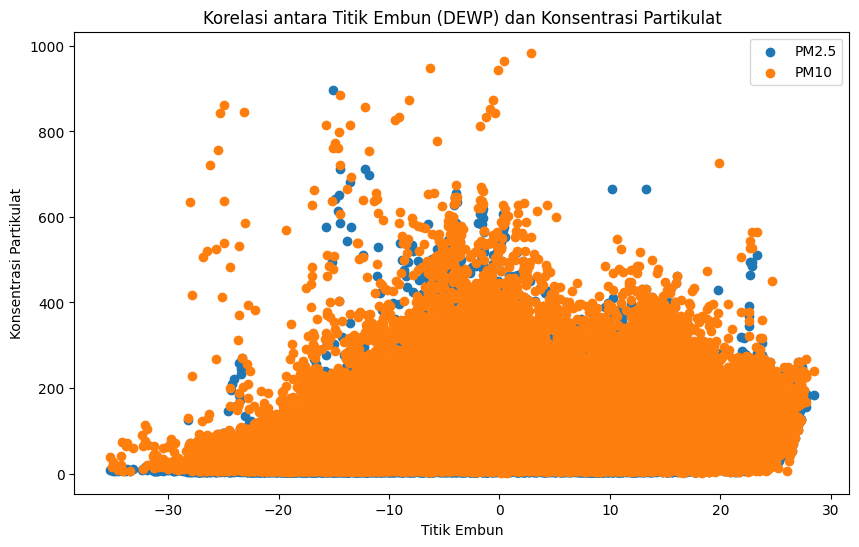

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(Aotizhongxin_df['DEWP'], Aotizhongxin_df['PM2.5'], label='PM2.5')
plt.scatter(Aotizhongxin_df['DEWP'], Aotizhongxin_df['PM10'], label='PM10')
plt.legend()
plt.title('Korelasi antara Titik Embun (DEWP) dan Konsentrasi Partikulat')
plt.xlabel('Titik Embun')
plt.ylabel('Konsentrasi Partikulat')
plt.show()

**Insight:**
- Dari visualisasi konsentrasi polutan PM2.5 dan PM10 per tahun diketahui bahwa kualitas udara Stasiun Aotizhongxin paling buruk terjadi pada tahun 2014 dan 2017, sedangkan yang paling baik terjadi pada tahun 2016.
- Dari visualisasi konsentrasi polutan PM2.5 dan PM10 per bulan diketahui bahwa kualitas udara Stasiun Aotizhongxin paling buruk terjadi pada bulan Maret, sedangkan yang paling baik terjadi pada tahun Agustus.
- Dari visualisasi konsentrasi polutan PM2.5 dan PM10 per hari diketahui bahwa kualitas udara Stasiun Aotizhongxin paling buruk terjadi pada Hari Sabtu, sedangkan yang paling baik terjadi pada Hari Senin.
- Dari visualisasi konsentrasi polutan PM2.5 dan PM10 per jam diketahui bahwa kualitas udara Stasiun Aotizhongxin paling buruk terjadi pada jam 22.00 hingga 02.00, sedangkan yang paling baik terjadi sekitar jam 15.00.
- Dari visualisasi korelasi antara Suhu (TEMP) dan Ozon (O3) diketahui bahwa kadar ozon cenderung meningkat ketika suhu naik.
- Dari visualisasi korelasi antara Suhu (TEMP) dan partikulat (PM2.5 dan PM10) diketahui bahwa perubahan suhu tidak terlalu berpengaruh terhadap konsentrasi partikulat, tetapi dapat dilihat bahwa partikulat lebih sedikit ketika suhu tinggi.
- Dari visualisasi korelasi antara Kecepatan Angin (WSPM) dan partikulat (PM2.5 dan PM10) diketahui bahwa partikulat cenderung menurun ketika angin kencang.
- Dari visualisasi korelasi antara Tekanan Udara (PRES) dan partikulat (PM2.5 dan PM10) diketahui bahwa perubahan tekanan udara tidak terlalu berpengaruh terhadap konsentrasi partikulat, tetapi dapat dilihat bahwa partikulat lebih sedikit ketika tekanan udara tinggi.
- Dari visualisasi korelasi antara Titik Embun (DEWP) dan partikulat (PM2.5 dan PM10) diketahui bahwa perubahan titik embun tidak terlalu berpengaruh terhadap konsentrasi partikulat, tetapi dapat dilihat bahwa partikulat lebih sedikit ketika titik embun rendah.

## Conclusion

1.   **Conclution pertanyaan 1**
- **Tahunan dan Bulanan**:
Kualitas udara di Stasiun Aotizhongxin paling buruk pada tahun 2014 dan 2017, serta bulan Maret. Kondisi terbaik terjadi pada tahun 2016 dan bulan Agustus.
- **Harian dan Jam**:
Polusi paling tinggi terjadi pada hari Sabtu dan di antara pukul 22.00-02.00. Kualitas udara terbaik terjadi pada hari Senin dan sekitar pukul 15.00.

---

2.   **Conclution pertanyaan 2**
- **Suhu**:
Kadar ozon meningkat seiring kenaikan suhu, tetapi suhu tinggi cenderung menurunkan kadar PM2.5 dan PM10.
- **Kecepatan Angin**:
Angin kencang menurunkan konsentrasi PM2.5 dan PM10.
- **Tekanan Udara dan Titik Embun**:
Polusi partikulat sedikit menurun pada tekanan tinggi dan titik embun rendah.
